In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_breast_cancer_dataset_path = kagglehub.dataset_download('yasserh/breast-cancer-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'breast-cancer-dataset' dataset.
Data source import complete.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as sts
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


# Breast Cancer Wisconsin (Diagnostic) Dataset

## Description
Breast cancer is the most common cancer amongst women in the world.  
It accounts for **25% of all cancer cases**, and affected **over 2.1 Million people in 2015** alone.  

It starts when cells in the breast begin to grow out of control. These cells usually form **tumors** that can be:
- Seen via **X-ray**
- Felt as **lumps** in the breast area  

The key challenge in detection is **how to classify tumors** into:
- **Malignant (cancerous)**
- **Benign (non-cancerous)**  

This dataset will be used to build machine learning models (with **SVMs**) to classify tumor types.

## Objective
1. **Understand the Dataset** & cleanup (if required).  
2. **Build classification models** to predict whether the cancer type is **Malignant or Benign**.  
3. **Fine-tune hyperparameters** & compare the **evaluation metrics** of various classification algorithms.  


In [5]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
print(f'Shape: {df.shape}')
print(df.isnull().sum())
df.describe()

Shape: (569, 32)
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
m = df[df['diagnosis']=='M']
print(f"""
Balance of M vs. B tumors
{round(len(m)/len(df['diagnosis'])*100, 2)}%
""")


Balance of M vs. B tumors
37.26%



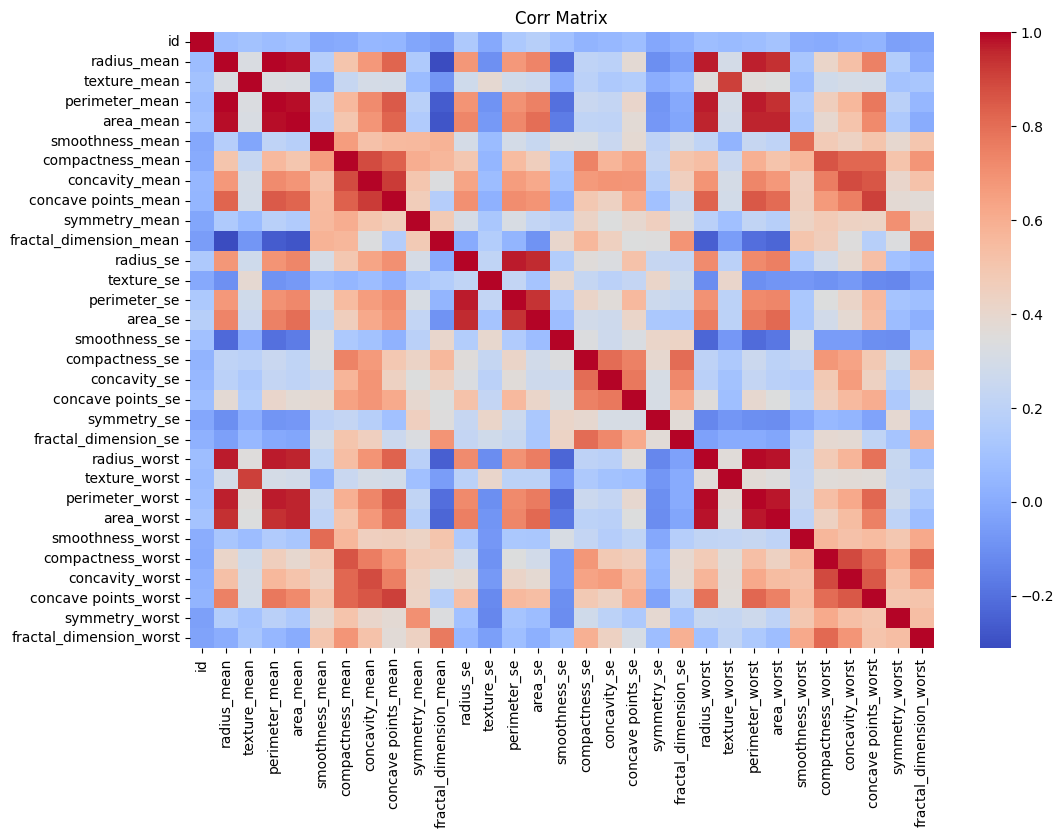

In [7]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Corr Matrix")
plt.show()

# Preprocessing

This dataset contains 30 varibles, but, some of them are strongly correlated, for example:
- All variables which are data related to area
    ```
    area_mean, radius _mean, perimeter_mean
    radius_worst, perimeter_worst, area_worst
    ```
Then, we can use PCA to reduce dimensionality and work on less variables, keeping as much information as possible.

In [8]:
#setting inputs and outputs
x = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis'].map({'M': 1, 'B':0})

#setting scaler to manage data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled




array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
#applying pca
from sklearn.decomposition import PCA

#we want to keep the 95% of information
pca = PCA(n_components = 0.9)
x_pca = pca.fit_transform(x_scaled)

print(f"""Exp. Variance by component:
{pca.explained_variance_ratio_}

Accumulated variance:
{pca.explained_variance_ratio_.cumsum()}""")

Exp. Variance by component:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]

Accumulated variance:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953 ]


In [10]:
df_scaled = pd.DataFrame(x_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df_scaled['class']=df['diagnosis']
df_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,class
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,M
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,M
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,M
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,M
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,M
...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,M
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,M
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,M
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,M


In [11]:
#quick info checking
print(df_scaled.isnull().sum())
pd.set_option("display.float_format", "{:.2f}".format)
df_scaled.describe()

PC1      0
PC2      0
PC3      0
PC4      0
PC5      0
PC6      0
PC7      0
class    0
dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,3.65,2.39,1.68,1.41,1.29,1.10,0.82
min,-5.57,-7.78,-4.88,-5.19,-7.49,-4.22,-4.08
25%,-2.76,-1.50,-1.02,-0.97,-0.61,-0.73,-0.45
50%,-1.17,-0.20,-0.16,-0.12,0.03,-0.07,-0.02
75%,2.51,1.23,0.86,0.79,0.62,0.62,0.45
max,16.32,12.57,10.11,5.13,4.79,5.13,5.42


# PCA explained
Once pca  was applied, we can see we have 7 main components only and those are enough to keep the 90% of the information.
In order to review this statement, we can plot it by using a scatter in 3d as following.



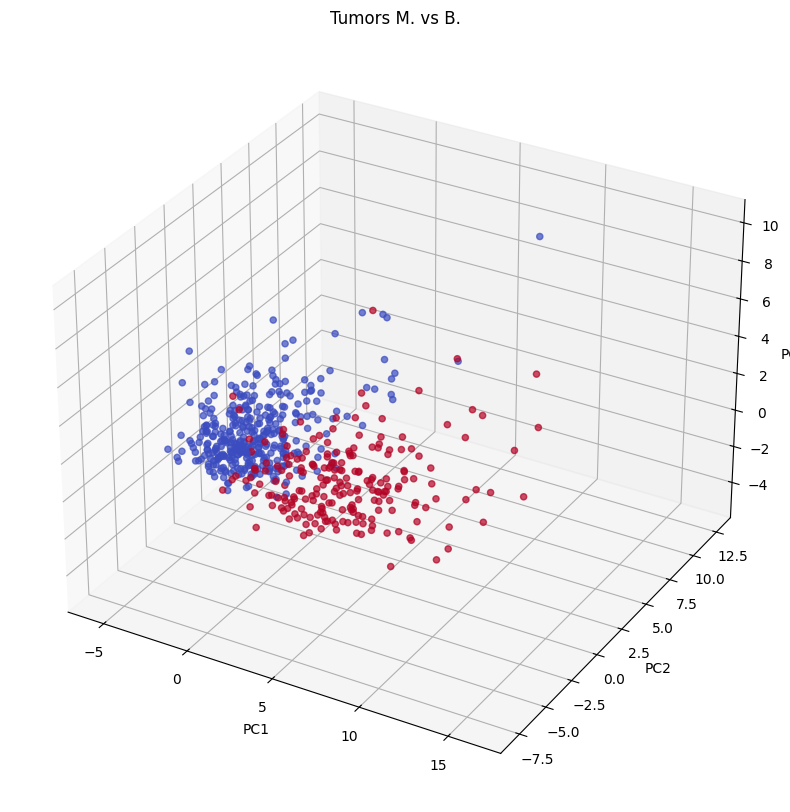

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=y, cmap="coolwarm", alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Tumors M. vs B.")
plt.show()

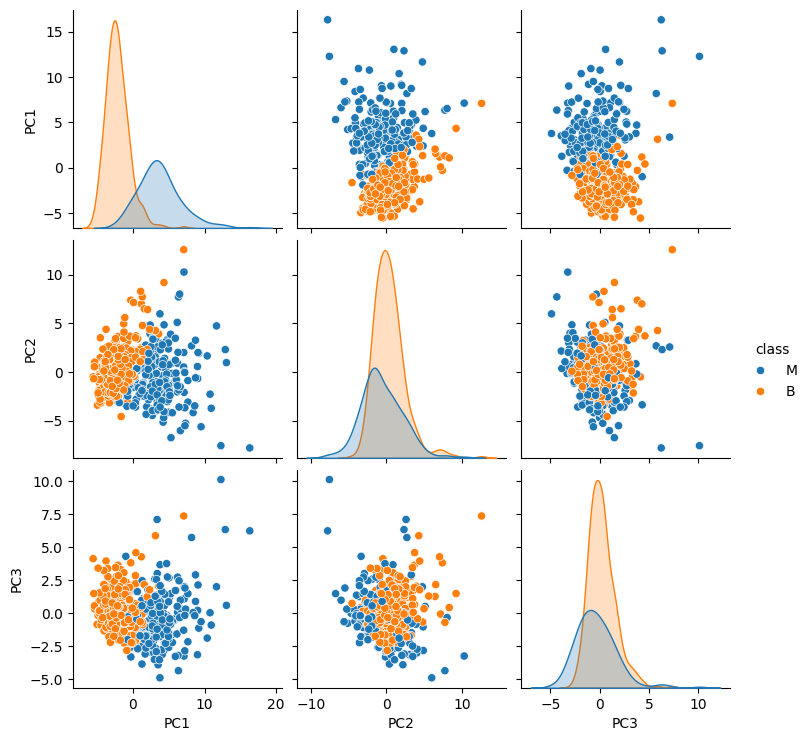

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df_scaled, vars=["PC1","PC2","PC3"], hue="class")

# Model
We already have defined x (input) and y (output) in the cells above, then we can start with a prediction model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

#split dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify = y, random_state = 42)

mlp = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', random_state=42, max_iter=1000)
mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n\n')
print(classification_report(y_test, y_pred))


Confusion Matrix
[[71  1]
 [ 8 34]] 


              precision    recall  f1-score   support

           0       0.90      0.99      0.94        72
           1       0.97      0.81      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



# Observations

This model performs very well at predicting benign tumors. However, it struggles with malignant cases, producing some false negatives. In medical applications, these errors are especially dangerous, since a malignant tumor could be misclassified as benign. Therefore, in this kind of experiment, it is crucial to minimize false negatives as much as possible, even if that means accepting more false positives.

Then, we need to balance the dataset training or re-sample.

Confusion Matrix
[[70  2]
 [ 5 66]] 


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.97      0.93      0.95        71

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



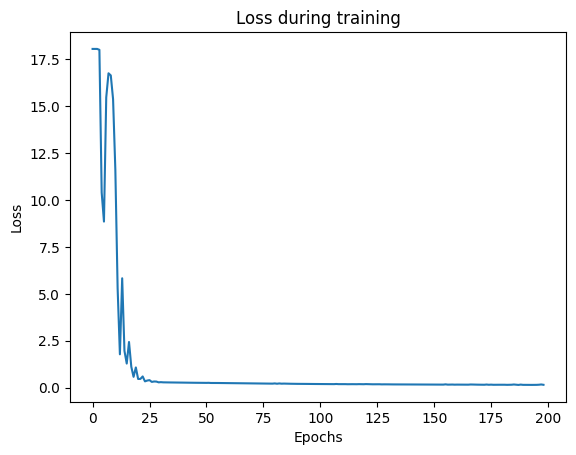

Used epochs: 199


In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(
    x_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred), "\n\n")
print(classification_report(y_test, y_pred))

plt.plot(mlp.loss_curve_)
plt.title("Loss during training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print("Used epochs:", mlp.n_iter_)

## Conclusion

After applying resampling (SMOTE) to balance the dataset, the neural network model achieved a consistent performance across both benign (0) and malignant (1) classes.

The confusion matrix shows that out of 143 test cases, the model correctly classified 136, with only 7 errors in total (2 false positives and 5 false negatives).  
For the benign class (0), the model reached a recall of 97% and a precision of 93%, meaning almost all benign cases were identified correctly, with only a few mistakenly flagged as malignant.  
For the malignant class (1), the model achieved a precision of 97% and a recall of 93%, showing robust performance in detecting malignant tumors, with very few missed cases.

Overall, the model achieved an accuracy of 95%, with macro and weighted averages for precision, recall, and F1-score also around 0.95, demonstrating strong consistency across both classes.

In practical terms, resampling effectively addressed the initial issue of low recall in the malignant class, significantly reducing the number of false negatives, which are the most critical errors in a medical context.

The model not only delivers high overall performance, but it also becomes more reliable in detecting malignant cases, which is crucial to minimize missed cancer diagnoses.